# 二进制编码

C:\Users\ndlcwx\AppData\Local\Temp\ipykernel_20468\2688574804.py:112: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


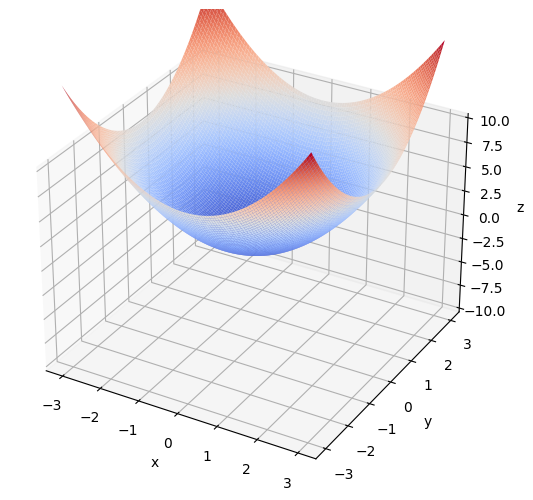

max_fitness: 0.0010039734819854969
最优的基因型： [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0
 0 0 1 0 1 1 0 0 0 1 0]
(x, y): (-0.0021198393177890296, 0.006181776892052682)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#染色体长度
DNA_SIZE = 24
#种群规模
POP_SIZE = 200
#交叉率 一般在0.6~0.9之间
CROSSOVER_RATE = 0.8
#变异率 一般小于0.1
MUTATION_RATE = 0.005
#种群迭代次数
N_GENERATIONS = 200
#自变量x和y的范围
X_BOUND = [-3, 3]
Y_BOUND = [-3, 3]

GET_MAX = 0

#定义函数
def F(x, y):
    return x ** 2 + y ** 2

#获取最大适应度
def get_Maxfitness(pop):
    x, y = translateDNA(pop)
    pred = F(x, y)
    # 减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度
    return (pred - np.min(pred)) + 1e-3    #np.min(pred) 获得pred中的最小值 相减是为了获得非负数 加上一个很小的数防止出现为0的适应度

#获取最小适应度
def get_Minfitness(pop):
    x, y = translateDNA(pop)
    pred = F(x, y)
    #减去最大值后fitness范围:[np.min(pred) - np.max(pred),0] 加上-号后范围为[0, np.max(pred) - np.min(pred)]   加上一个很小的数防止出现为0的适应度
    return -(pred - np.max(pred)) + 1e-3

def translateDNA(pop):  # pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    #友情提示：pop是二维的哦~
    x_pop = pop[:, 1::2]  # 奇数列表示X
    y_pop = pop[:, ::2]  # 偶数列表示y

    # pop:(POP_SIZE,DNA_SIZE)*(DNA_SIZE,1) --> (POP_SIZE,1)     dot() 矩阵乘法计算
    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    #返回的是x与y染色体的实数值(解码值)
    return x, y


def crossover_and_mutation(pop, CROSSOVER_RATE=0.8):
    new_pop = []
    for father in pop:  # 遍历种群中的每一个个体，将该个体作为父亲
        child = father  # 孩子先得到父亲的全部基因
        if np.random.rand() < CROSSOVER_RATE:  # 产生一个0~1随机值，如果小于0.8则交叉
            mother = pop[np.random.randint(POP_SIZE)]  # 再种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low=0, high=DNA_SIZE * 2)  # 随机产生交叉的点 [low, high)
            child[cross_points:] = mother[cross_points:]  # 孩子得到位于交叉点后的母亲的基因
        mutation(child)  # 后代变异
        new_pop.append(child) #加入下一代种群

    return new_pop #返回新一代种群

#变异
def mutation(child, MUTATION_RATE=0.003):
    if np.random.rand() < MUTATION_RATE:  # 以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(low=0, high=DNA_SIZE * 2)  # 随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point] ^ 1  # 将变异点的二进制为反转

def select(pop, fitness):  # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,p=(fitness) / (fitness.sum()))
    '''
    介绍以下choice方法的参数：
    numpy.random.choice(a, size=None, replace=True, p=None)
    #从a(只要是ndarray都可以，但必须是一维的)中随机抽取数字，并组成指定大小(size)的数组
    #replace:True表示可以取相同数字，False表示不可以取相同数字
    #数组p：与数组a相对应，表示取数组a中每个元素的概率，默认为选取每个元素的概率相同。
    也就是说，从种群中根据适应度函数的大小为挑选概率，挑选POP_SIZE个元素作为下一代
    '''
    return pop[idx]


def print_info(pop):
    if GET_MAX == 1:
        fitness = get_Maxfitness(pop)
    else:
        fitness = get_Minfitness(pop)
    #获取适应度最大的下标索引
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    x, y = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))

def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100) #等价于 np.linspace(-3,3,100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y) #扩展为二维矩阵，方便建图
    Z = F(X, Y) #计算函数值
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)#设置绘图参数
    ax.set_zlim(-10, 10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(3)
    plt.show()

if __name__ == "__main__":
    #创建画布
    fig = plt.figure()
    ax = Axes3D(fig)
    #更改为交互模式
    plt.ion()  #交互模式，程序遇到plt.show不会暂停，而是继续执行
    #绘制3D图
    plot_3d(ax)

    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))  # 生成随机数的范围是[0，2) 矩阵大小为 rows: POP_SIZE cols:DNA_SIZE*2,因为两个自变量
    for _ in range(N_GENERATIONS):  # 迭代N代
        x, y = translateDNA(pop)
        if 'sca' in locals():#'sca'判断是不是一个全局变量，如果是，则将其移除
            sca.remove()
        #定义sca为scatter返回对象，scatter就是在函数图像上画出当前种群每个个体的位置
        sca = ax.scatter(x, y, F(x, y), c='black', marker='o');
        plt.show();
        plt.pause(0.1)
        #交叉变异，产生新一代种群
        pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
        #计算适应度
        if GET_MAX == 1:
            fitness = get_Maxfitness(pop)
        else:
            fitness = get_Minfitness(pop)
        #选择
        pop = select(pop, fitness)  # 选择生成新的种群
    #打印最后的全局最优信息
    print_info(pop)
    plt.ioff() #关闭交互模式
    plot_3d(ax)
    



# 实数制编码

In [63]:
#染色体长度
DNA_SIZE = 1  ##实数值编码的基因片段长度就是1,即单个变量
#种群规模
POP_SIZE = 200
#交叉率 一般在0.6~0.9之间
CROSSOVER_RATE = 0.9
#变异率 一般小于0.1
MUTATION_RATE = 0.005
#种群迭代次数
N_GENERATIONS = 5000
#自变量个数
var_size = 2
#自变量x和y的范围
bounds_min = [-3, -5]  ## x的最小值是-3，y的最小值是-5
bounds_max = [3, 5]    ## x的最大值是3，y的最大值是5

#定义函数
def F(x, y):
    return x ** 2 + y ** 2

## 定义初始种群函数

def init_pop():
    pop = np.zeros((POP_SIZE,var_size))
    for i in range(POP_SIZE):
        for j in range(var_size):
            pop[i,j] = np.random.uniform(bounds_min[j],bounds_max[j])
    return pop

## 适应度函数
def fitness_value(pop):
    x  = pop[:,0]
    y = pop[:,1]
    pre = F(x,y)
    # return (pre-np.min(pre)+1e-3) ##求最大值
    return -(pre-np.max(pre))+1e-3  ##求最小值

## 选择染色体函数
def select1(pop,fitness):
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,p=(fitness) / (fitness.sum()))
    return pop[idx]

def mutation1(child):
    if np.random.rand()<MUTATION_RATE:
        mutate_point = np.random.randint(0,2) ##选择要进行变异的自变量 x或者y
        child[mutate_point] = np.random.uniform(bounds_min[mutate_point],bounds_max[mutate_point])



##交叉和变异函数
def crossover_and_mutation1(pop):
    new_pop = []
    for father in pop:
        child = father
        if np.random.rand()<CROSSOVER_RATE:
            mother = pop[np.random.randint(POP_SIZE//2)]
            cross_point = np.random.randint(0,var_size)
            child[cross_point] = mother[cross_point]
        mutation1(child)
        new_pop.append(child)
    return new_pop

## 寻找最优值
def Getbest(pop):
    fitnesses = fitness_value(pop)
    max_index = np.argmax(fitnesses)
    x = pop[max_index][0]
    y = pop[max_index][1]
    print('最优点为',x,y)
    print('最小值为:',F(x,y))   
if __name__ =='__main__':
    pop = init_pop()  ##初始化种群
    for i in range(N_GENERATIONS):
        fit  = fitness_value(pop)
        select = select1(pop,fit)
        poplst = crossover_and_mutation1(pop=select)
        pop = np.array(poplst)
    Getbest(pop)   
# pop = init_pop()
# fit = fitness_value(pop)
# select = select1(pop = pop,fitness=fit)
# new = crossover_and_mutation1(select)
# print(np.array(new))

最优点为 -0.01749605222206352 -0.01676009951925206
最小值为: 0.0005870127792524069
